In [2]:
import numpy as np
import pandas as pd
import skbio
from sklearn_extra.cluster import KMedoids 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
roi_df = pd.read_csv("/Users/Akhila/pyens/UoR_PhD/999.Final_Results/07.Feature_Selection_Methodologies/00.Dataset/MRI_rois_filtered.csv")
roi_df

,SD002,SD003,SD004,FS003,FS004,FS005,FS006,FS007,FS008,FS009,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
0,F,AD,85.9,879,528,1968,1072,253,2307,3573,...,84.049047,152.949572,30.559873,289.808994,164.883411,119.078854,139.364354,46.105687,30.590374,1762.601968
1,M,AD,82.0,884,605,2093,1449,524,3174,4500,...,172.409762,313.333221,51.547364,517.468495,267.551975,199.387414,239.586157,35.914880,60.608920,3047.069487
2,F,AD,79.3,834,324,2140,1518,309,2555,3862,...,126.484382,151.400515,31.908452,360.920543,202.664591,137.881451,176.551033,32.096342,34.127632,2208.919115
3,F,AD,75.3,865,606,2081,1178,418,2368,3419,...,164.466590,258.822070,37.958169,462.374328,239.311681,166.935996,206.625709,68.970329,34.277991,2742.781272
4,F,AD,85.0,613,285,1783,1022,307,2259,3598,...,101.489743,168.431477,52.309200,297.819502,165.801176,113.971379,147.106402,17.150174,24.451415,1865.880063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,M,CN,66.0,631,366,2571,865,1004,3893,5077,...,217.635075,288.500291,69.275710,551.209657,305.223334,233.001991,264.646421,120.856821,83.101666,3490.496270
1998,F,CN,69.0,902,509,2008,1467,493,3073,4452,...,167.596585,256.819106,40.819599,496.448639,248.495102,166.189545,208.124114,59.042294,55.170033,2924.843789
1999,M,CN,67.0,834,989,2076,1662,584,3321,3620,...,178.185764,335.679631,64.809388,555.429698,280.587759,203.994260,253.758077,83.470425,77.513410,3519.541985
2000,M,CN,81.0,1005,669,1975,1325,1035,3090,4541,...,227.571202,294.284047,72.631930,595.077852,320.640646,218.441104,289.552975,46.466703,70.403814,3373.003116


In [4]:
df = roi_df.drop(["SD002","SD004"], axis= 1)
df

,SD003,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
0,AD,879,528,1968,1072,253,2307,3573,2445,778,...,84.049047,152.949572,30.559873,289.808994,164.883411,119.078854,139.364354,46.105687,30.590374,1762.601968
1,AD,884,605,2093,1449,524,3174,4500,3532,1060,...,172.409762,313.333221,51.547364,517.468495,267.551975,199.387414,239.586157,35.914880,60.608920,3047.069487
2,AD,834,324,2140,1518,309,2555,3862,2287,999,...,126.484382,151.400515,31.908452,360.920543,202.664591,137.881451,176.551033,32.096342,34.127632,2208.919115
3,AD,865,606,2081,1178,418,2368,3419,2599,759,...,164.466590,258.822070,37.958169,462.374328,239.311681,166.935996,206.625709,68.970329,34.277991,2742.781272
4,AD,613,285,1783,1022,307,2259,3598,2211,834,...,101.489743,168.431477,52.309200,297.819502,165.801176,113.971379,147.106402,17.150174,24.451415,1865.880063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,CN,631,366,2571,865,1004,3893,5077,3109,877,...,217.635075,288.500291,69.275710,551.209657,305.223334,233.001991,264.646421,120.856821,83.101666,3490.496270
1998,CN,902,509,2008,1467,493,3073,4452,3580,1016,...,167.596585,256.819106,40.819599,496.448639,248.495102,166.189545,208.124114,59.042294,55.170033,2924.843789
1999,CN,834,989,2076,1662,584,3321,3620,3499,1292,...,178.185764,335.679631,64.809388,555.429698,280.587759,203.994260,253.758077,83.470425,77.513410,3519.541985
2000,CN,1005,669,1975,1325,1035,3090,4541,3298,1068,...,227.571202,294.284047,72.631930,595.077852,320.640646,218.441104,289.552975,46.466703,70.403814,3373.003116


In [5]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['SD003'] = labelencoder.fit_transform(df['SD003'])
df

,SD003,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
0,0,879,528,1968,1072,253,2307,3573,2445,778,...,84.049047,152.949572,30.559873,289.808994,164.883411,119.078854,139.364354,46.105687,30.590374,1762.601968
1,0,884,605,2093,1449,524,3174,4500,3532,1060,...,172.409762,313.333221,51.547364,517.468495,267.551975,199.387414,239.586157,35.914880,60.608920,3047.069487
2,0,834,324,2140,1518,309,2555,3862,2287,999,...,126.484382,151.400515,31.908452,360.920543,202.664591,137.881451,176.551033,32.096342,34.127632,2208.919115
3,0,865,606,2081,1178,418,2368,3419,2599,759,...,164.466590,258.822070,37.958169,462.374328,239.311681,166.935996,206.625709,68.970329,34.277991,2742.781272
4,0,613,285,1783,1022,307,2259,3598,2211,834,...,101.489743,168.431477,52.309200,297.819502,165.801176,113.971379,147.106402,17.150174,24.451415,1865.880063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1,631,366,2571,865,1004,3893,5077,3109,877,...,217.635075,288.500291,69.275710,551.209657,305.223334,233.001991,264.646421,120.856821,83.101666,3490.496270
1998,1,902,509,2008,1467,493,3073,4452,3580,1016,...,167.596585,256.819106,40.819599,496.448639,248.495102,166.189545,208.124114,59.042294,55.170033,2924.843789
1999,1,834,989,2076,1662,584,3321,3620,3499,1292,...,178.185764,335.679631,64.809388,555.429698,280.587759,203.994260,253.758077,83.470425,77.513410,3519.541985
2000,1,1005,669,1975,1325,1035,3090,4541,3298,1068,...,227.571202,294.284047,72.631930,595.077852,320.640646,218.441104,289.552975,46.466703,70.403814,3373.003116


In [6]:
y_train = df["SD003"]
y_train

0       0
1       0
2       0
3       0
4       0
       ..
1997    1
1998    1
1999    1
2000    1
2001    1
Name: SD003, Length: 2002, dtype: int64

In [7]:
df = df.drop(["SD003"], axis= 1)
df

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
0,879,528,1968,1072,253,2307,3573,2445,778,3762,...,84.049047,152.949572,30.559873,289.808994,164.883411,119.078854,139.364354,46.105687,30.590374,1762.601968
1,884,605,2093,1449,524,3174,4500,3532,1060,4724,...,172.409762,313.333221,51.547364,517.468495,267.551975,199.387414,239.586157,35.914880,60.608920,3047.069487
2,834,324,2140,1518,309,2555,3862,2287,999,3926,...,126.484382,151.400515,31.908452,360.920543,202.664591,137.881451,176.551033,32.096342,34.127632,2208.919115
3,865,606,2081,1178,418,2368,3419,2599,759,3761,...,164.466590,258.822070,37.958169,462.374328,239.311681,166.935996,206.625709,68.970329,34.277991,2742.781272
4,613,285,1783,1022,307,2259,3598,2211,834,3781,...,101.489743,168.431477,52.309200,297.819502,165.801176,113.971379,147.106402,17.150174,24.451415,1865.880063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,631,366,2571,865,1004,3893,5077,3109,877,5541,...,217.635075,288.500291,69.275710,551.209657,305.223334,233.001991,264.646421,120.856821,83.101666,3490.496270
1998,902,509,2008,1467,493,3073,4452,3580,1016,4444,...,167.596585,256.819106,40.819599,496.448639,248.495102,166.189545,208.124114,59.042294,55.170033,2924.843789
1999,834,989,2076,1662,584,3321,3620,3499,1292,5394,...,178.185764,335.679631,64.809388,555.429698,280.587759,203.994260,253.758077,83.470425,77.513410,3519.541985
2000,1005,669,1975,1325,1035,3090,4541,3298,1068,5644,...,227.571202,294.284047,72.631930,595.077852,320.640646,218.441104,289.552975,46.466703,70.403814,3373.003116


In [8]:
corr_matrix = df.corr()
corr_matrix

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,1.000000,0.296987,0.340415,0.220317,0.244207,0.456319,0.603094,0.489902,0.335057,0.349937,...,0.164880,0.338809,0.219421,0.356103,0.341740,0.307291,0.337923,0.207455,0.305598,0.374071
FS004,0.296987,1.000000,0.369833,0.261786,0.190508,0.373663,0.359329,0.391082,0.370417,0.317591,...,0.172296,0.226632,0.211606,0.243078,0.226819,0.205670,0.224860,0.139444,0.185566,0.261342
FS005,0.340415,0.369833,1.000000,0.370681,0.283151,0.450168,0.436150,0.484300,0.430256,0.454947,...,0.225390,0.279382,0.238833,0.285835,0.272717,0.253056,0.272551,0.127147,0.248003,0.312469
FS006,0.220317,0.261786,0.370681,1.000000,0.231223,0.425151,0.325094,0.403663,0.415445,0.640170,...,0.196642,0.241764,0.149649,0.307682,0.297863,0.263816,0.294682,0.181437,0.218378,0.323441
FS007,0.244207,0.190508,0.283151,0.231223,1.000000,0.502568,0.305082,0.444509,0.218402,0.319862,...,0.253407,0.290011,0.169992,0.351546,0.307606,0.243416,0.310770,0.159849,0.258935,0.360250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,0.307291,0.205670,0.253056,0.263816,0.243416,0.357321,0.325217,0.406134,0.260795,0.351840,...,0.414575,0.455928,0.233990,0.814439,0.916997,1.000000,0.930223,0.382128,0.682297,0.810437
FS400,0.337923,0.224860,0.272551,0.294682,0.310770,0.398172,0.361581,0.446808,0.266836,0.388625,...,0.431018,0.613859,0.291329,0.913578,0.989729,0.930223,1.000000,0.459592,0.706480,0.909939
FS401,0.207455,0.139444,0.127147,0.181437,0.159849,0.266186,0.220776,0.290518,0.141231,0.245119,...,0.054241,0.579994,0.349216,0.592780,0.518766,0.382128,0.459592,1.000000,0.583783,0.602415
FS402,0.305598,0.185566,0.248003,0.218378,0.258935,0.356494,0.310682,0.384430,0.236898,0.343761,...,0.276621,0.635527,0.460752,0.758651,0.728188,0.682297,0.706480,0.583783,1.000000,0.775775


In [9]:
corr_df = pd.DataFrame(corr_matrix)
corr_df

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,1.000000,0.296987,0.340415,0.220317,0.244207,0.456319,0.603094,0.489902,0.335057,0.349937,...,0.164880,0.338809,0.219421,0.356103,0.341740,0.307291,0.337923,0.207455,0.305598,0.374071
FS004,0.296987,1.000000,0.369833,0.261786,0.190508,0.373663,0.359329,0.391082,0.370417,0.317591,...,0.172296,0.226632,0.211606,0.243078,0.226819,0.205670,0.224860,0.139444,0.185566,0.261342
FS005,0.340415,0.369833,1.000000,0.370681,0.283151,0.450168,0.436150,0.484300,0.430256,0.454947,...,0.225390,0.279382,0.238833,0.285835,0.272717,0.253056,0.272551,0.127147,0.248003,0.312469
FS006,0.220317,0.261786,0.370681,1.000000,0.231223,0.425151,0.325094,0.403663,0.415445,0.640170,...,0.196642,0.241764,0.149649,0.307682,0.297863,0.263816,0.294682,0.181437,0.218378,0.323441
FS007,0.244207,0.190508,0.283151,0.231223,1.000000,0.502568,0.305082,0.444509,0.218402,0.319862,...,0.253407,0.290011,0.169992,0.351546,0.307606,0.243416,0.310770,0.159849,0.258935,0.360250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,0.307291,0.205670,0.253056,0.263816,0.243416,0.357321,0.325217,0.406134,0.260795,0.351840,...,0.414575,0.455928,0.233990,0.814439,0.916997,1.000000,0.930223,0.382128,0.682297,0.810437
FS400,0.337923,0.224860,0.272551,0.294682,0.310770,0.398172,0.361581,0.446808,0.266836,0.388625,...,0.431018,0.613859,0.291329,0.913578,0.989729,0.930223,1.000000,0.459592,0.706480,0.909939
FS401,0.207455,0.139444,0.127147,0.181437,0.159849,0.266186,0.220776,0.290518,0.141231,0.245119,...,0.054241,0.579994,0.349216,0.592780,0.518766,0.382128,0.459592,1.000000,0.583783,0.602415
FS402,0.305598,0.185566,0.248003,0.218378,0.258935,0.356494,0.310682,0.384430,0.236898,0.343761,...,0.276621,0.635527,0.460752,0.758651,0.728188,0.682297,0.706480,0.583783,1.000000,0.775775


In [10]:
abs_corr = corr_df.abs()
abs_corr

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,1.000000,0.296987,0.340415,0.220317,0.244207,0.456319,0.603094,0.489902,0.335057,0.349937,...,0.164880,0.338809,0.219421,0.356103,0.341740,0.307291,0.337923,0.207455,0.305598,0.374071
FS004,0.296987,1.000000,0.369833,0.261786,0.190508,0.373663,0.359329,0.391082,0.370417,0.317591,...,0.172296,0.226632,0.211606,0.243078,0.226819,0.205670,0.224860,0.139444,0.185566,0.261342
FS005,0.340415,0.369833,1.000000,0.370681,0.283151,0.450168,0.436150,0.484300,0.430256,0.454947,...,0.225390,0.279382,0.238833,0.285835,0.272717,0.253056,0.272551,0.127147,0.248003,0.312469
FS006,0.220317,0.261786,0.370681,1.000000,0.231223,0.425151,0.325094,0.403663,0.415445,0.640170,...,0.196642,0.241764,0.149649,0.307682,0.297863,0.263816,0.294682,0.181437,0.218378,0.323441
FS007,0.244207,0.190508,0.283151,0.231223,1.000000,0.502568,0.305082,0.444509,0.218402,0.319862,...,0.253407,0.290011,0.169992,0.351546,0.307606,0.243416,0.310770,0.159849,0.258935,0.360250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,0.307291,0.205670,0.253056,0.263816,0.243416,0.357321,0.325217,0.406134,0.260795,0.351840,...,0.414575,0.455928,0.233990,0.814439,0.916997,1.000000,0.930223,0.382128,0.682297,0.810437
FS400,0.337923,0.224860,0.272551,0.294682,0.310770,0.398172,0.361581,0.446808,0.266836,0.388625,...,0.431018,0.613859,0.291329,0.913578,0.989729,0.930223,1.000000,0.459592,0.706480,0.909939
FS401,0.207455,0.139444,0.127147,0.181437,0.159849,0.266186,0.220776,0.290518,0.141231,0.245119,...,0.054241,0.579994,0.349216,0.592780,0.518766,0.382128,0.459592,1.000000,0.583783,0.602415
FS402,0.305598,0.185566,0.248003,0.218378,0.258935,0.356494,0.310682,0.384430,0.236898,0.343761,...,0.276621,0.635527,0.460752,0.758651,0.728188,0.682297,0.706480,0.583783,1.000000,0.775775


In [11]:
dist = abs_corr-1
dist

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,0.000000,-0.703013,-0.659585,-0.779683,-0.755793,-0.543681,-0.396906,-0.510098,-0.664943,-0.650063,...,-0.835120,-0.661191,-0.780579,-0.643897,-0.658260,-0.692709,-0.662077,-0.792545,-0.694402,-0.625929
FS004,-0.703013,0.000000,-0.630167,-0.738214,-0.809492,-0.626337,-0.640671,-0.608918,-0.629583,-0.682409,...,-0.827704,-0.773368,-0.788394,-0.756922,-0.773181,-0.794330,-0.775140,-0.860556,-0.814434,-0.738658
FS005,-0.659585,-0.630167,0.000000,-0.629319,-0.716849,-0.549832,-0.563850,-0.515700,-0.569744,-0.545053,...,-0.774610,-0.720618,-0.761167,-0.714165,-0.727283,-0.746944,-0.727449,-0.872853,-0.751997,-0.687531
FS006,-0.779683,-0.738214,-0.629319,0.000000,-0.768777,-0.574849,-0.674906,-0.596337,-0.584555,-0.359830,...,-0.803358,-0.758236,-0.850351,-0.692318,-0.702137,-0.736184,-0.705318,-0.818563,-0.781622,-0.676559
FS007,-0.755793,-0.809492,-0.716849,-0.768777,0.000000,-0.497432,-0.694918,-0.555491,-0.781598,-0.680138,...,-0.746593,-0.709989,-0.830008,-0.648454,-0.692394,-0.756584,-0.689230,-0.840151,-0.741065,-0.639750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,-0.692709,-0.794330,-0.746944,-0.736184,-0.756584,-0.642679,-0.674783,-0.593866,-0.739205,-0.648160,...,-0.585425,-0.544072,-0.766010,-0.185561,-0.083003,0.000000,-0.069777,-0.617872,-0.317703,-0.189563
FS400,-0.662077,-0.775140,-0.727449,-0.705318,-0.689230,-0.601828,-0.638419,-0.553192,-0.733164,-0.611375,...,-0.568982,-0.386141,-0.708671,-0.086422,-0.010271,-0.069777,0.000000,-0.540408,-0.293520,-0.090061
FS401,-0.792545,-0.860556,-0.872853,-0.818563,-0.840151,-0.733814,-0.779224,-0.709482,-0.858769,-0.754881,...,-0.945759,-0.420006,-0.650784,-0.407220,-0.481234,-0.617872,-0.540408,0.000000,-0.416217,-0.397585
FS402,-0.694402,-0.814434,-0.751997,-0.781622,-0.741065,-0.643506,-0.689318,-0.615570,-0.763102,-0.656239,...,-0.723379,-0.364473,-0.539248,-0.241349,-0.271812,-0.317703,-0.293520,-0.416217,0.000000,-0.224225


In [12]:
x_train = dist.copy()
x_train

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,0.000000,-0.703013,-0.659585,-0.779683,-0.755793,-0.543681,-0.396906,-0.510098,-0.664943,-0.650063,...,-0.835120,-0.661191,-0.780579,-0.643897,-0.658260,-0.692709,-0.662077,-0.792545,-0.694402,-0.625929
FS004,-0.703013,0.000000,-0.630167,-0.738214,-0.809492,-0.626337,-0.640671,-0.608918,-0.629583,-0.682409,...,-0.827704,-0.773368,-0.788394,-0.756922,-0.773181,-0.794330,-0.775140,-0.860556,-0.814434,-0.738658
FS005,-0.659585,-0.630167,0.000000,-0.629319,-0.716849,-0.549832,-0.563850,-0.515700,-0.569744,-0.545053,...,-0.774610,-0.720618,-0.761167,-0.714165,-0.727283,-0.746944,-0.727449,-0.872853,-0.751997,-0.687531
FS006,-0.779683,-0.738214,-0.629319,0.000000,-0.768777,-0.574849,-0.674906,-0.596337,-0.584555,-0.359830,...,-0.803358,-0.758236,-0.850351,-0.692318,-0.702137,-0.736184,-0.705318,-0.818563,-0.781622,-0.676559
FS007,-0.755793,-0.809492,-0.716849,-0.768777,0.000000,-0.497432,-0.694918,-0.555491,-0.781598,-0.680138,...,-0.746593,-0.709989,-0.830008,-0.648454,-0.692394,-0.756584,-0.689230,-0.840151,-0.741065,-0.639750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,-0.692709,-0.794330,-0.746944,-0.736184,-0.756584,-0.642679,-0.674783,-0.593866,-0.739205,-0.648160,...,-0.585425,-0.544072,-0.766010,-0.185561,-0.083003,0.000000,-0.069777,-0.617872,-0.317703,-0.189563
FS400,-0.662077,-0.775140,-0.727449,-0.705318,-0.689230,-0.601828,-0.638419,-0.553192,-0.733164,-0.611375,...,-0.568982,-0.386141,-0.708671,-0.086422,-0.010271,-0.069777,0.000000,-0.540408,-0.293520,-0.090061
FS401,-0.792545,-0.860556,-0.872853,-0.818563,-0.840151,-0.733814,-0.779224,-0.709482,-0.858769,-0.754881,...,-0.945759,-0.420006,-0.650784,-0.407220,-0.481234,-0.617872,-0.540408,0.000000,-0.416217,-0.397585
FS402,-0.694402,-0.814434,-0.751997,-0.781622,-0.741065,-0.643506,-0.689318,-0.615570,-0.763102,-0.656239,...,-0.723379,-0.364473,-0.539248,-0.241349,-0.271812,-0.317703,-0.293520,-0.416217,0.000000,-0.224225


In [13]:
x_train_df = x_train.copy()
x_train_df

,FS003,FS004,FS005,FS006,FS007,FS008,FS009,FS010,FS011,FS012,...,FS394,FS395,FS396,FS397,FS398,FS399,FS400,FS401,FS402,FS403
FS003,0.000000,-0.703013,-0.659585,-0.779683,-0.755793,-0.543681,-0.396906,-0.510098,-0.664943,-0.650063,...,-0.835120,-0.661191,-0.780579,-0.643897,-0.658260,-0.692709,-0.662077,-0.792545,-0.694402,-0.625929
FS004,-0.703013,0.000000,-0.630167,-0.738214,-0.809492,-0.626337,-0.640671,-0.608918,-0.629583,-0.682409,...,-0.827704,-0.773368,-0.788394,-0.756922,-0.773181,-0.794330,-0.775140,-0.860556,-0.814434,-0.738658
FS005,-0.659585,-0.630167,0.000000,-0.629319,-0.716849,-0.549832,-0.563850,-0.515700,-0.569744,-0.545053,...,-0.774610,-0.720618,-0.761167,-0.714165,-0.727283,-0.746944,-0.727449,-0.872853,-0.751997,-0.687531
FS006,-0.779683,-0.738214,-0.629319,0.000000,-0.768777,-0.574849,-0.674906,-0.596337,-0.584555,-0.359830,...,-0.803358,-0.758236,-0.850351,-0.692318,-0.702137,-0.736184,-0.705318,-0.818563,-0.781622,-0.676559
FS007,-0.755793,-0.809492,-0.716849,-0.768777,0.000000,-0.497432,-0.694918,-0.555491,-0.781598,-0.680138,...,-0.746593,-0.709989,-0.830008,-0.648454,-0.692394,-0.756584,-0.689230,-0.840151,-0.741065,-0.639750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FS399,-0.692709,-0.794330,-0.746944,-0.736184,-0.756584,-0.642679,-0.674783,-0.593866,-0.739205,-0.648160,...,-0.585425,-0.544072,-0.766010,-0.185561,-0.083003,0.000000,-0.069777,-0.617872,-0.317703,-0.189563
FS400,-0.662077,-0.775140,-0.727449,-0.705318,-0.689230,-0.601828,-0.638419,-0.553192,-0.733164,-0.611375,...,-0.568982,-0.386141,-0.708671,-0.086422,-0.010271,-0.069777,0.000000,-0.540408,-0.293520,-0.090061
FS401,-0.792545,-0.860556,-0.872853,-0.818563,-0.840151,-0.733814,-0.779224,-0.709482,-0.858769,-0.754881,...,-0.945759,-0.420006,-0.650784,-0.407220,-0.481234,-0.617872,-0.540408,0.000000,-0.416217,-0.397585
FS402,-0.694402,-0.814434,-0.751997,-0.781622,-0.741065,-0.643506,-0.689318,-0.615570,-0.763102,-0.656239,...,-0.723379,-0.364473,-0.539248,-0.241349,-0.271812,-0.317703,-0.293520,-0.416217,0.000000,-0.224225


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train_df)
x_scaled = scaler.transform(x_train_df)
x_scaled

array([[ 4.6322052 ,  0.43740775,  0.36588605, ..., -0.50100963,
        -0.09435027, -0.04187986],
       [ 0.23650674,  5.01994062,  0.52562329, ..., -1.00475088,
        -0.86149718, -0.6307166 ],
       [ 0.5080436 ,  0.91224749,  3.94732978, ..., -1.09583745,
        -0.4624484 , -0.36365376],
       ...,
       [-0.32330468, -0.58952226, -0.79212511, ...,  5.36917712,
         1.68359059,  1.15087211],
       [ 0.29034591, -0.28887996, -0.13589204, ...,  2.28635659,
         4.34372514,  2.05641438],
       [ 0.71848401,  0.20505793,  0.21414795, ...,  2.42435958,
         2.91065192,  3.22765253]])

In [15]:
my_pcoa = skbio.stats.ordination.pcoa(x_train_df.values)

/Users/Akhila/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -3.3129945514723014 and the largest is 21.440039285328805.
  warn(


In [16]:
pcoa = my_pcoa.samples[['PC1', 'PC2']]
pcoa

,PC1,PC2
0,-0.249624,0.045351
1,-0.269355,-0.058101
2,-0.343162,-0.062262
3,-0.314647,-0.026755
4,-0.193380,-0.174000
...,...,...
260,-0.070743,0.184375
261,-0.075365,0.199520
262,0.128961,0.179950
263,0.016691,0.221595


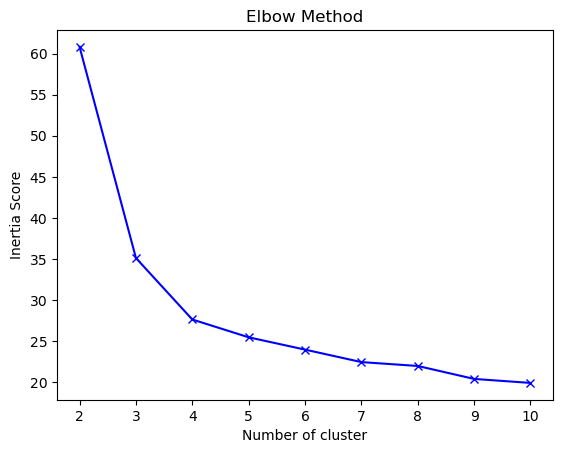

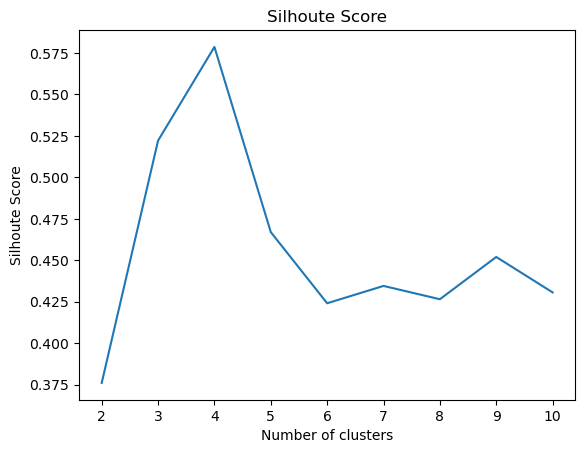

In [17]:
sse = {} 
sw = []

for k in range(2, 11):
    kmedo = KMedoids(n_clusters=k, max_iter=10, random_state=1).fit(pcoa)
    sse[k] = kmedo.inertia_
    y_kmed = kmedo.fit_predict(pcoa)
    silhouette_avg = silhouette_score(pcoa, y_kmed,metric='euclidean')
    sw.append(silhouette_avg)
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.title('Elbow Method')
plt.xlabel("Number of cluster")
plt.ylabel("Inertia Score")
plt.show()

plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoute Score')      #within cluster sum of squares
plt.show()

In [19]:
sse

{2: 60.80337768306335,
 3: 35.13512512473089,
 4: 27.65994821664617,
 5: 25.493622781850448,
 6: 23.99588317852377,
 7: 22.478642526363082,
 8: 22.008183272955513,
 9: 20.43257314229209,
 10: 19.946186801690594}

In [18]:
featurenameslst = []
col_names = x_train.columns
for i in range(1,11):
    kmedo = KMedoids(n_clusters = i, random_state=1)
    kmedo.fit(pcoa)
    array_centers = kmedo.cluster_centers_
    for index in kmedo.medoid_indices_:
        label = kmedo.labels_[index]
        number = index - 1 
        medoidpc1 = pcoa.iloc[number,0]
        medoidpc2 = pcoa.iloc[number,1]
        featurename = col_names[number]
        featurenameslst.append(featurename)
        print(f'{label:<5}  {medoidpc1}   {medoidpc2}        {number:<10}   {featurename}')      
    print("********************************************")

0      -0.05216850713215148   0.11521922690460007        87           FS158
********************************************
0      0.10566058168195679   -0.047910273803672306        99           FS170
1      -0.355868329684334   -0.023124456864785488        17           FS020
********************************************
0      0.40582877495040937   0.04958768845166087        168          FS307
1      -0.2927202008218231   -0.16870719992613675        14           FS017
2      -0.10269451623652788   0.09368952689185779        72           FS143
********************************************
0      0.46214696826272794   0.11315877061683571        35           FS106
1      0.26757648612572577   0.06293171067925941        54           FS125
2      -0.338886774778837   -0.23839987350119288        120          FS191
3      -0.10269451623652788   0.09368952689185779        72           FS143
********************************************
0      0.26757648612572577   0.06293171067925941        54     

In [20]:
res = np.array(featurenameslst)
res

array(['FS158', 'FS170', 'FS020', 'FS307', 'FS017', 'FS143', 'FS106',
       'FS125', 'FS191', 'FS143', 'FS125', 'FS155', 'FS106', 'FS191',
       'FS397', 'FS106', 'FS144', 'FS188', 'FS013', 'FS337', 'FS125',
       'FS351', 'FS151', 'FS174', 'FS202', 'FS324', 'FS125', 'FS397',
       'FS351', 'FS334', 'FS363', 'FS159', 'FS382', 'FS152', 'FS125',
       'FS008', 'FS351', 'FS171', 'FS187', 'FS361', 'FS367', 'FS391',
       'FS125', 'FS031', 'FS399', 'FS351', 'FS171', 'FS187', 'FS142',
       'FS145', 'FS125', 'FS399', 'FS391', 'FS031', 'FS346'], dtype='<U5')

In [21]:
resss = pd.DataFrame(featurenameslst)
resss

,0
0,FS158
1,FS170
2,FS020
3,FS307
4,FS017
5,FS143
6,FS106
7,FS125
8,FS191
9,FS143


In [22]:
listunique = resss[0].value_counts()

In [23]:
listunique

FS125    7
FS351    4
FS106    3
FS397    2
FS187    2
FS399    2
FS143    2
FS191    2
FS031    2
FS391    2
FS171    2
FS382    1
FS152    1
FS008    1
FS158    1
FS361    1
FS367    1
FS363    1
FS142    1
FS145    1
FS159    1
FS202    1
FS334    1
FS324    1
FS170    1
FS174    1
FS151    1
FS337    1
FS013    1
FS188    1
FS144    1
FS155    1
FS017    1
FS307    1
FS020    1
FS346    1
Name: 0, dtype: int64